# *лабораторная работа №2. визуализация данных.*
**цель работы:** изучение программных средств для визуализации наборов данных.
### *порядок выполнения учебной задачи:*
**подключение библиотек**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

**загрузка данных**

In [ ]:
!wget https://raw.githubusercontent.com/asmetuerr/MMO/main/telecom_churn.csv

--2025-02-17 05:03:29--  https://raw.githubusercontent.com/asmetuerr/MMO/main/telecom_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310177 (303K) [text/plain]
Saving to: ‘telecom_churn.csv’

telecom_churn.csv   100%[===================>] 302.91K  --.-KB/s    in 0.04s   

2025-02-17 05:03:29 (6.72 MB/s) - ‘telecom_churn.csv’ saved [310177/310177]



In [ ]:
data_path = "telecom_churn.csv"
data = pd.read_csv(data_path)
data.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**визуализация количественных признаков**

In [ ]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

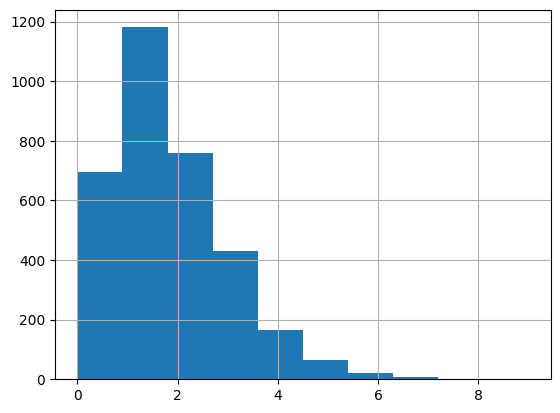

In [ ]:
data['customer service calls'].hist();

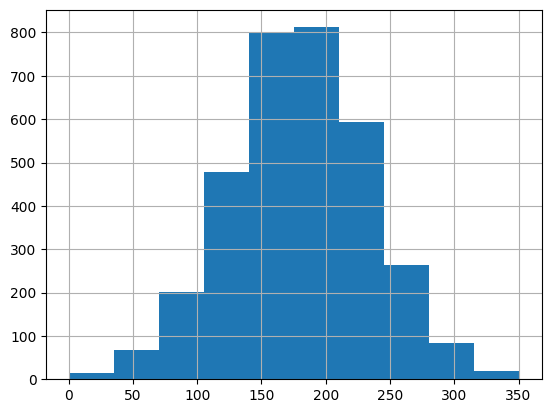

In [ ]:
data['total day minutes'].hist();

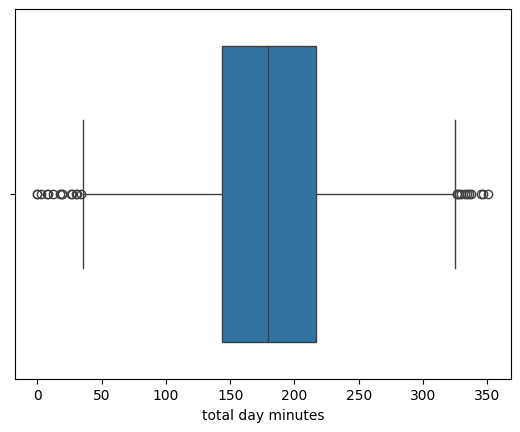

In [ ]:
# использование Seaborn
# построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(x=data['total day minutes']);

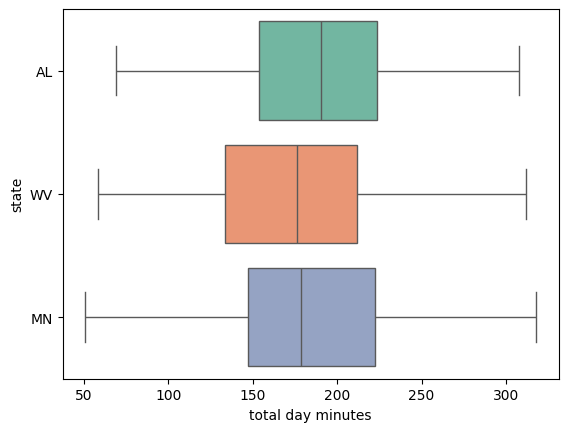

In [ ]:
top_data = data[['state','total day minutes']]
top_data = top_data.groupby('state').sum()
top_data = top_data.sort_values('total day minutes',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='state',
            x='total day minutes',
            data=data[data.state.isin(top_data)], palette='Set2', hue='state');

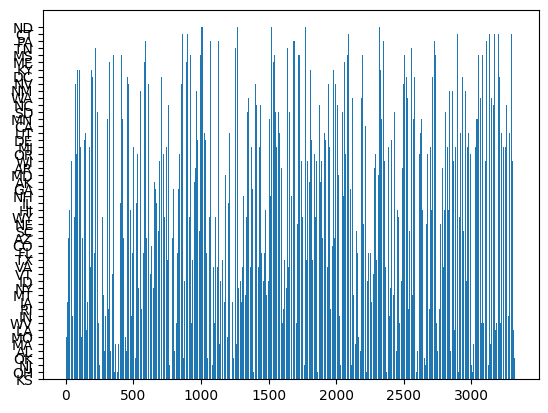

In [ ]:
plt.bar(data.index, data['state'])
plt.show()

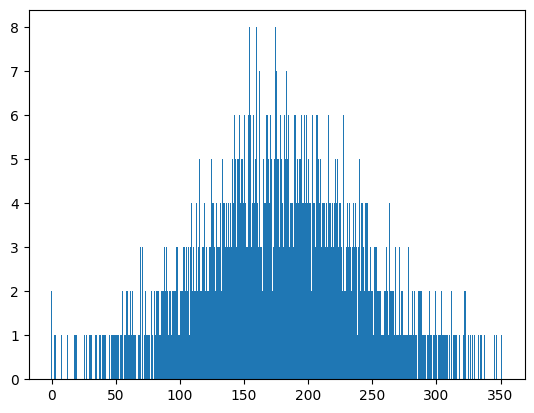

In [ ]:
hist = data['total day minutes'].value_counts()
plt.bar(hist.index, hist);

In [ ]:
# отбор признаков
feats=[f for f in data.columns if 'charge' in f]
feats

['total day charge',
 'total eve charge',
 'total night charge',
 'total intl charge']

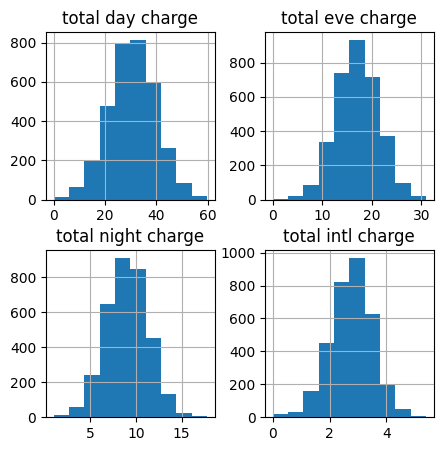

In [ ]:
# построение гистограммы для нескольких признаков
data[feats].hist(figsize=(5,5));

**категориальные признаки**

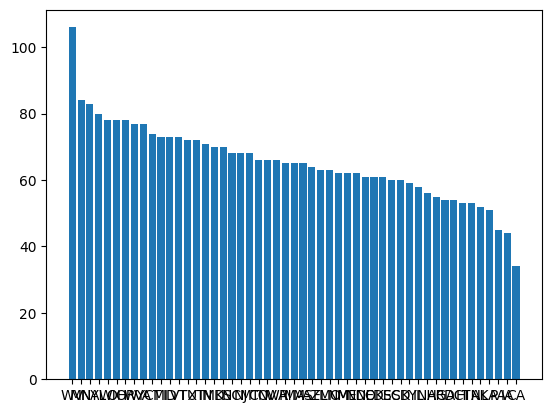

In [ ]:
# определение первых n "популярных" штатов
# data['State'].value_counts().head(10)
hist = data['state'].value_counts()
plt.bar(hist.index, hist);

In [ ]:
# фактически бинарный признак
data['churn'].value_counts()

,count
churn,
False,2850
True,483


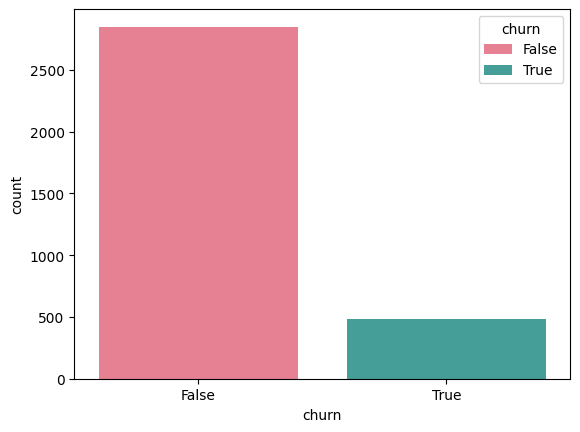

In [ ]:
sns.countplot(x=data['churn'], palette='husl', hue=data['churn']);

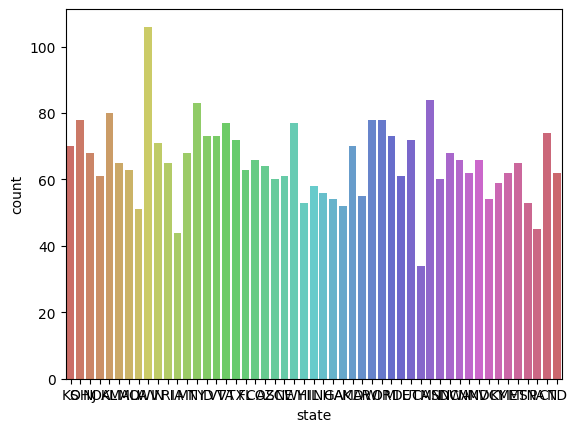

In [ ]:
# гистограмма для всех штатов
sns.countplot(x=data['state'], palette='hls', hue=data['state']);

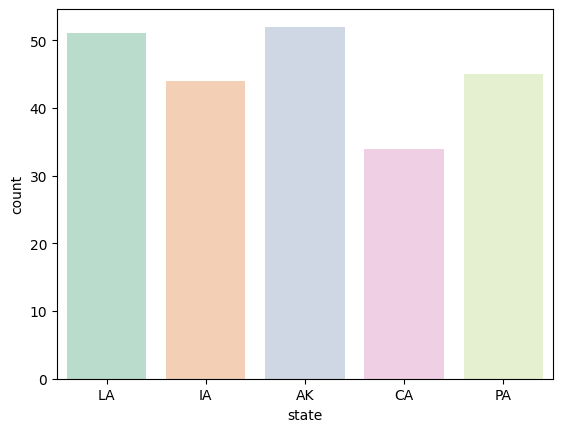

In [ ]:
# гистограмма "популярных" штатов
sns.countplot(x=data[data['state'].isin(data['state'].value_counts().tail(5).index)]['state'], palette='Pastel2', hue=data[data['state'].isin(data['state'].value_counts().tail(5).index)]['state']);

**взаимосвязанные признаки.**

**количественный - количественный.**

In [ ]:
# список колонок
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [ ]:
# отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'charge' in f]
len(feats)

4

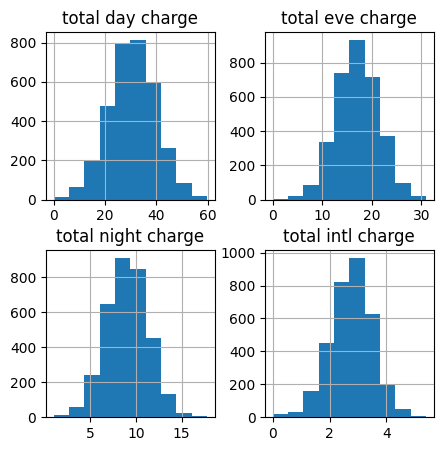

In [ ]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5,5));

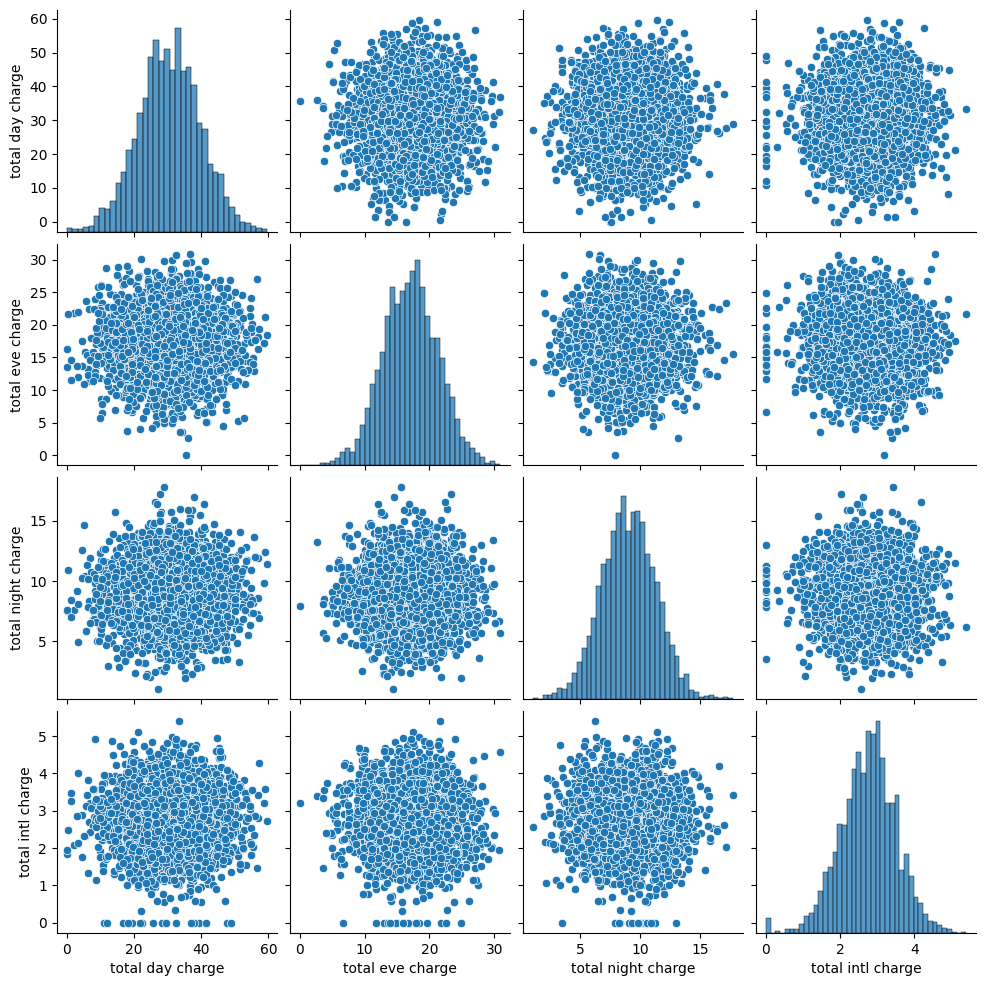

In [ ]:
# попарное распределение признаков
# применение Seaborn
sns.pairplot(data[feats]);

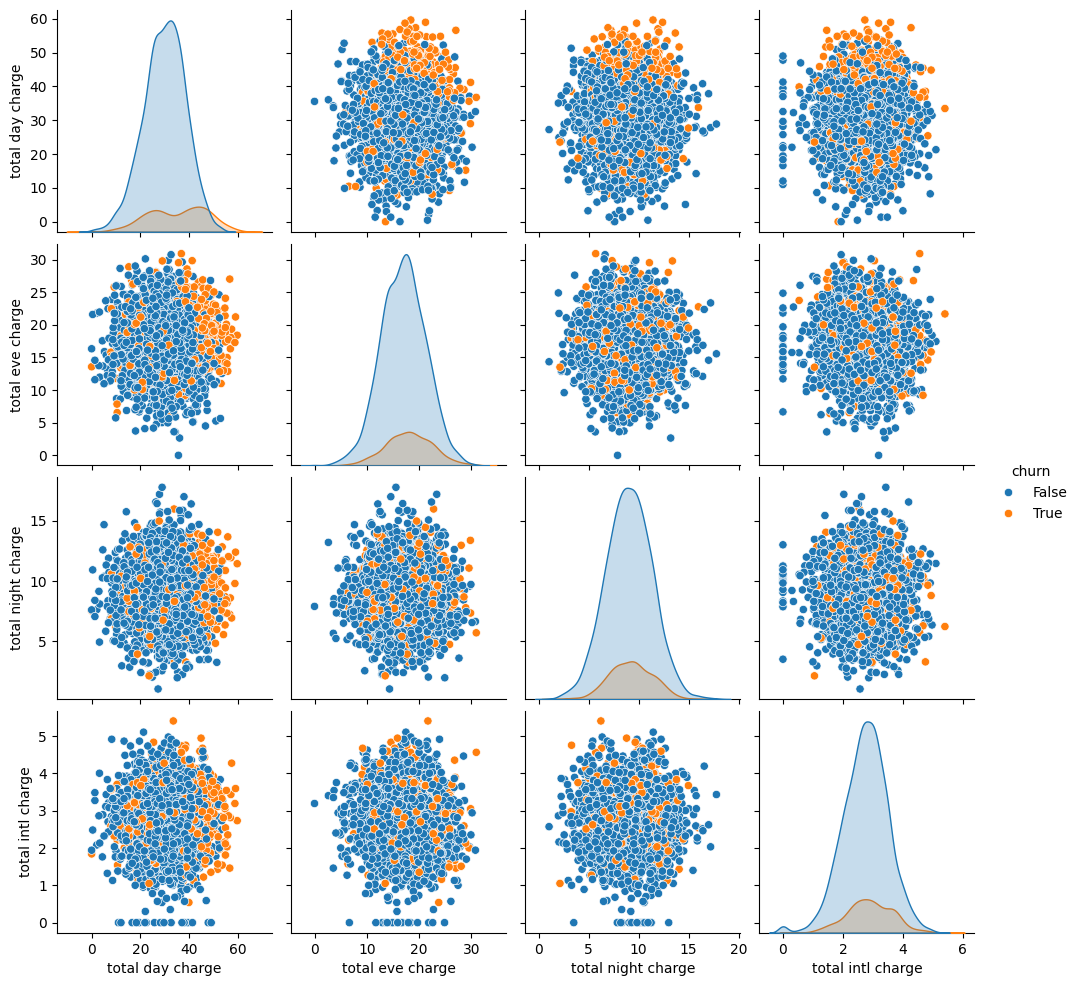

In [ ]:
sns.pairplot(data[feats + ['churn']], hue='churn');

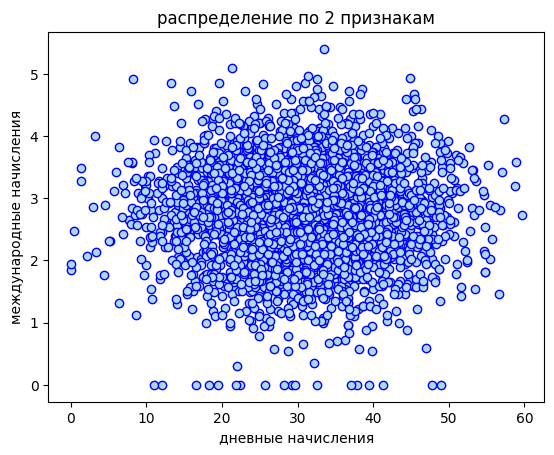

In [ ]:
plt.scatter(data['total day charge'],
            data['total intl charge'],
            color='lightblue', edgecolors='blue')
plt.xlabel('дневные начисления')
plt.ylabel('международные начисления')
plt.title('распределение по 2 признакам');

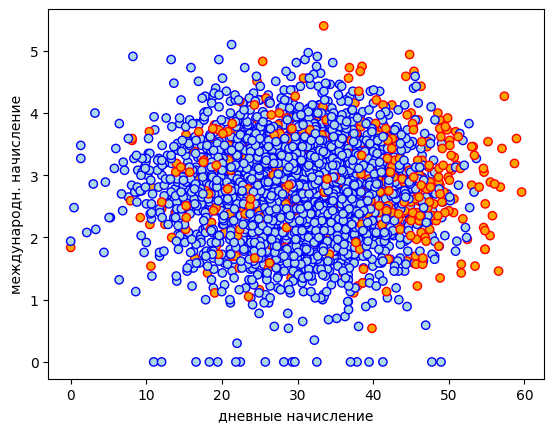

In [ ]:
# раскрашивание данных
# цвет в зависимости от ухода клиента
c = data['churn'].map({False: 'lightblue', True: 'orange'})
edge_c = data['churn'].map({False: 'blue', True: 'red'})

# настройка графики
plt.scatter(data['total day charge'], data['total intl charge'],
            color=c, edgecolors=edge_c
           )
plt.xlabel('дневные начисление')
plt.ylabel('международн. начисление');

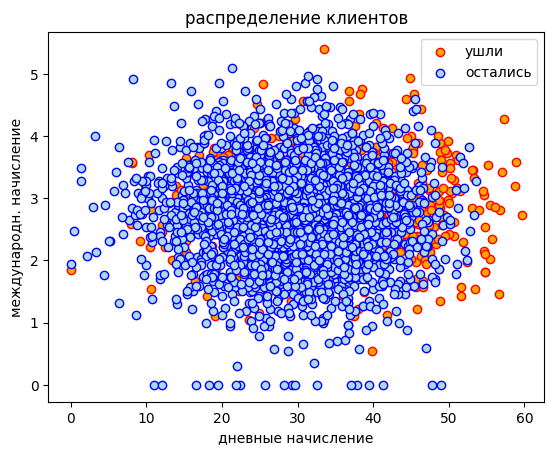

In [ ]:
# раскраска лояльных и ушедших клиентов,
# добавление легенды

# ушедшие клиенты
data_churn = data[data['churn']]
# оставшиеся клиенты
data_loyal = data[~data['churn']]

plt.scatter(data_churn['total day charge'],
            data_churn['total intl charge'],
            color='orange',
            edgecolors='red',
            label='ушли'
           )
plt.scatter(data_loyal['total day charge'],
            data_loyal['total intl charge'],
            color='lightblue',
            edgecolors='blue',
            label='остались'
           )
plt.xlabel('дневные начисление')
plt.ylabel('международн. начисление')
plt.title('распределение клиентов')
plt.legend();

### *порядок выполнения индивидуального задания*

**"Клинические данные о сердечной недостаточности".**

Этот набор данных содержит медицинские записи 299 пациентов с сердечной недостаточностью, собранные в период наблюдения за ними. В каждом профиле пациента есть 13 клинических характеристик.

Подробное описание набора данных можно найти в разделе «Набор данных» следующей статьи:

 Давиде Чикко, Джузеппе Юрман: «Машинное обучение может прогнозировать выживаемость пациентов с сердечной недостаточностью только по уровню креатинина в сыворотке крови и фракции выброса». BMC Медицинская информатика и принятие решений 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5


In [ ]:
# загрузка данных
!wget https://raw.githubusercontent.com/asmetuerr/MMO/main/heart.csv

--2025-03-10 02:56:30--  https://raw.githubusercontent.com/asmetuerr/MMO/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12239 (12K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.95K  --.-KB/s    in 0s      

2025-03-10 02:56:31 (30.3 MB/s) - ‘heart.csv’ saved [12239/12239]



In [ ]:
# загрузка набора данных с помощью pandas и получение, первичный анализ признаков
data_path2 = "heart.csv"
data2 = pd.read_csv(data_path2)
data2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# информация о признаках набора данных
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<Axes: >

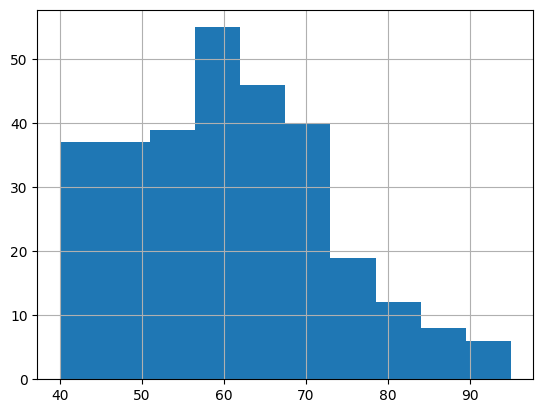

In [ ]:
# визуализация количественных признаков
data2['age'].hist()

# для построения гистограммы вызывается метод hist(). его можно использовать
# для построения гистограмм по нескольким признакам, при этом неколичественные
# признаки игнорируются

<BarContainer object of 17 artists>

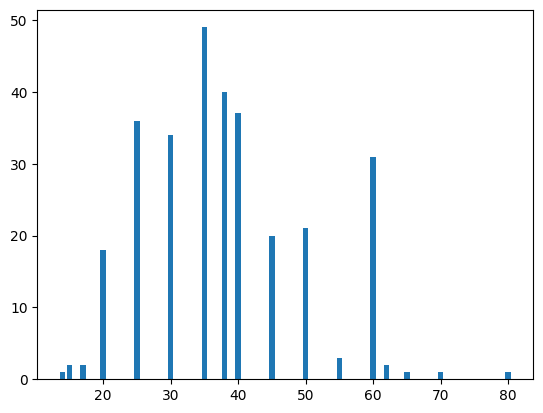

In [ ]:
# построение гистограммы с использованием matplotlib для представления распределения значений признака

hist = data2['ejection_fraction'].value_counts()
plt.bar(hist.index, hist)

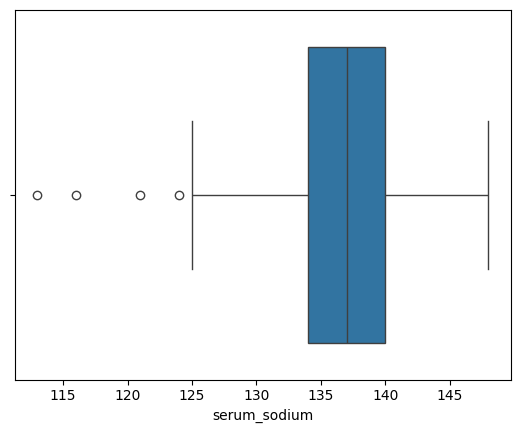

In [ ]:
# один из эффективных типов графиков для анализа количественных признаков
# - "ящик с усами" (boxplot). график boxplot состоит из коробки, усов и
# точек. коробка показывает интеквариальный размах распределения, черта внутри
# коробки обозначает медиану распределения. усы отображают весь разброс точек
# кроме выбросов, т.е. минимальные и максимальные значения. точками на
# графике обозначаются выбросы, т.е. те значения, которые не вписываются
# в промежуток значений, заданный усами графика.

sns.boxplot(x = data2['serum_sodium']);

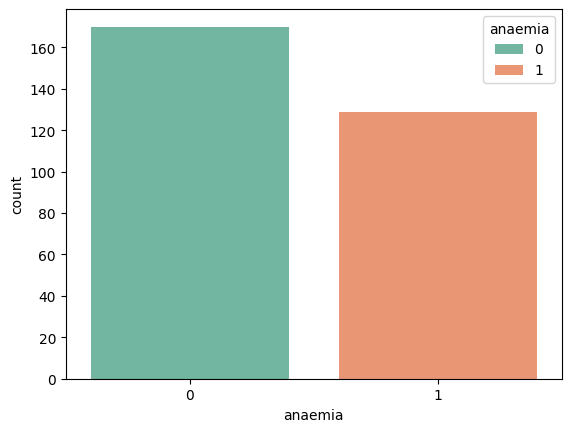

In [ ]:
sns.countplot(x = data2['anaemia'], palette='Set2', hue=data2['anaemia']);

In [ ]:
# взаимосвязанные признаки
# количественный - количественный
# список колонок
data2.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# Отбор числовых признаков, содержащих слово 'capacity'
feats = [f for f in data2.columns if 'serum' in f]
len(feats)

2

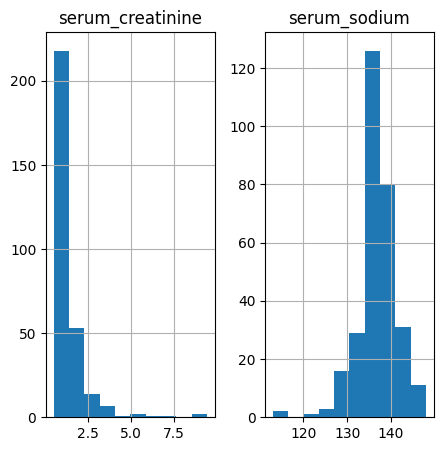

In [ ]:
# строим отдельные гистограммы
# для нескольких признаков
data2[feats].hist(figsize=(5,5));

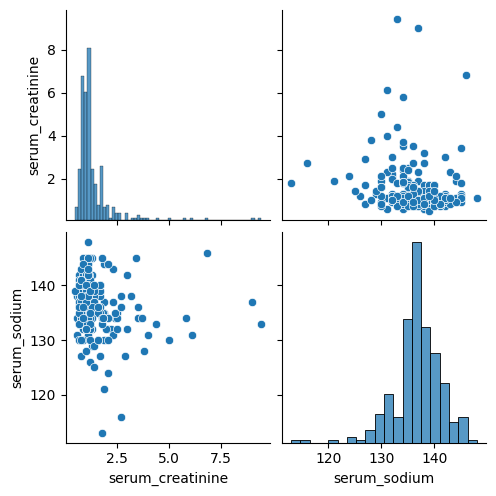

In [ ]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data2[feats]);

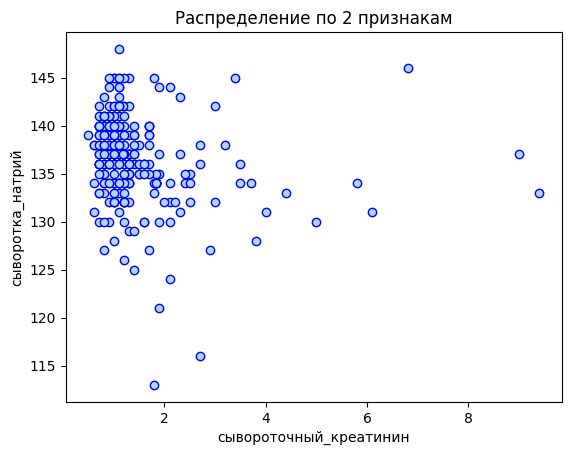

In [ ]:
# Использование matplotlib, подписей данных, заголовков Использование простейших пользовательских цветов
plt.scatter(data2['serum_creatinine'],
            data2['serum_sodium'],
            color='lightblue', edgecolors='blue')
plt.xlabel('сывороточный_креатинин')
plt.ylabel('сыворотка_натрий')
plt.title('Распределение по 2 признакам');

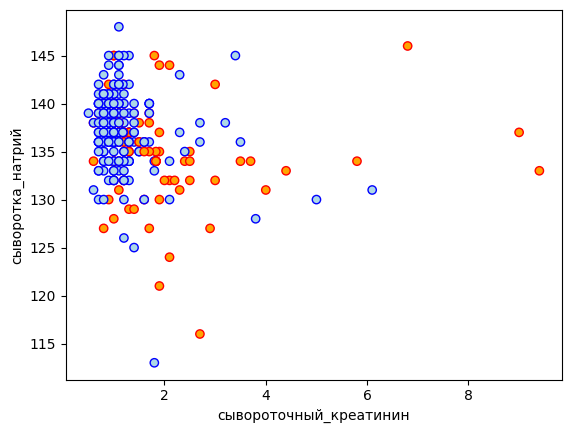

In [ ]:
# Раскрашивание данных
# Цвет в зависимости от смерти пациента
c = data2['DEATH_EVENT'].map({0: 'lightblue', 1: 'orange'})
edge_c = data2['DEATH_EVENT'].map({0: 'blue', 1: 'red'})
# Настройка графика
plt.scatter(data2['serum_creatinine'], data2['serum_sodium'],
            color=c, edgecolors=edge_c
           )
plt.xlabel('сывороточный_креатинин')
plt.ylabel('сыворотка_натрий');

In [ ]:
# Корреляция признаков
# Применяется функция corr() из Pandas
data2.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


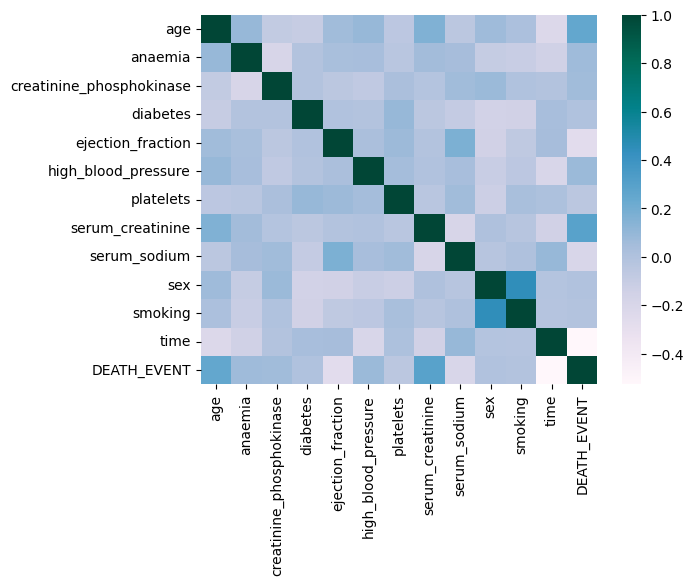

In [ ]:
# В реальных задачах анализ такой
# матрицы затруднен, необходимо или автоматизировать (скрипты),
# или визуализировать (графики)
sns.heatmap(data2.corr(), cmap=plt.cm.PuBuGn);

# из карты heatmap видно, что некоторые признаки коррелируют: например
# корреляция в парах (smoking, sex), (DEATH_EVENT, serum_creatinine).

In [ ]:
# Удаление коррелирующих признаков
data2_uncorr = data2.drop(feats, axis=1)
data2_uncorr.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets', 'sex',
       'smoking', 'time', 'DEATH_EVENT'],
      dtype='object')

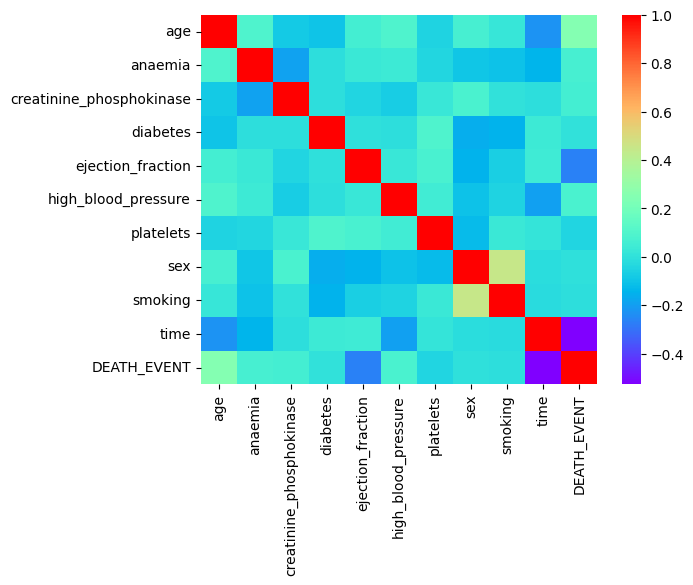

In [ ]:
# Перестраиваем heatmap без коррелирующих признаков
sns.heatmap(data2_uncorr.corr(), cmap=plt.cm.rainbow);